# Practical 13

# Develop an application to predict diabetes using logistic regression classifier.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Machine Learning/diabetes.csv")  # Importing the data set

In [3]:
data  #viewing the data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


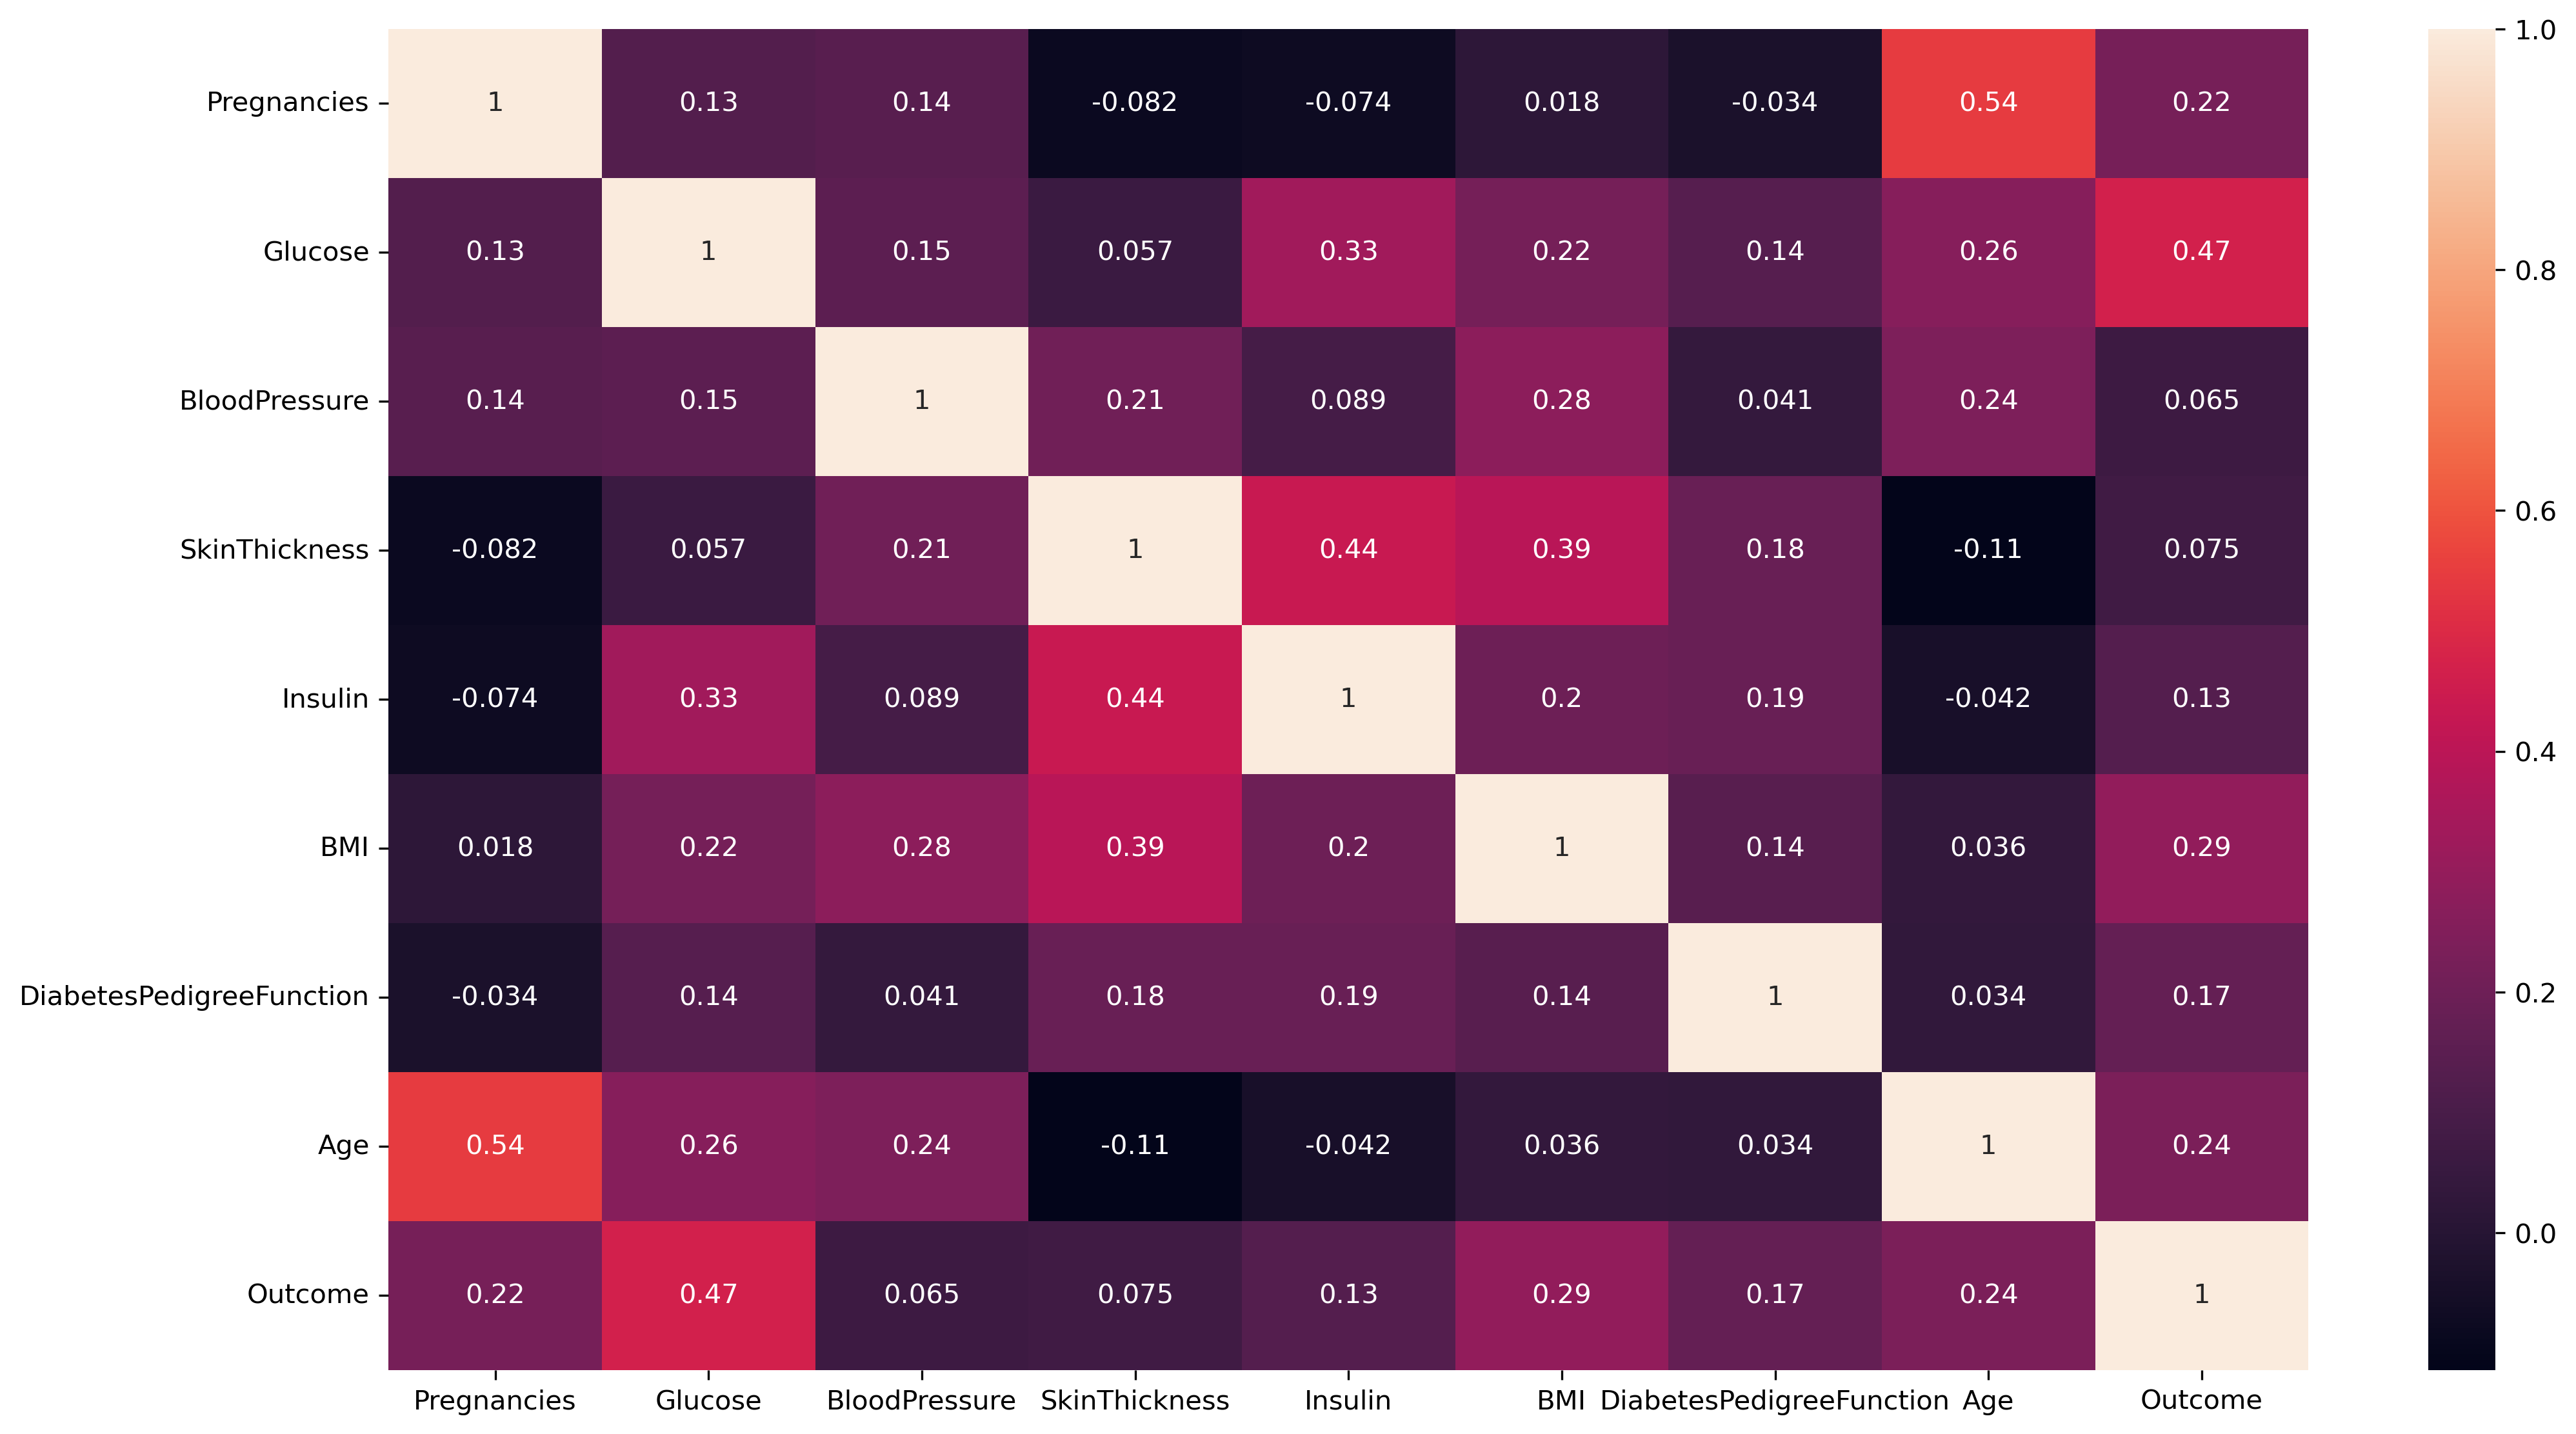

In [4]:
fig = plt.figure(figsize = (16,9) , dpi = 300)  # Finding correlation between different columns using heatmap
sns.heatmap(data.corr(),annot = True) #pearson correlation

plt.show()

In [5]:
x = data.iloc[:, 1:2].values  # Separating dependent and independent variables
y = data.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split  # Separating training and testing data set.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25 , random_state = 0 )

In [7]:
from sklearn.preprocessing import StandardScaler  # Scaling the data.
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print(xtrain)

[[-1.01521454]
 [-0.09964691]
 [-0.95207195]
 [ 0.59492164]
 [ 0.75277813]
 [ 1.03691981]
 [-0.60478767]
 [-0.69950156]
 [-0.32064599]
 [ 0.56335034]
 [-0.57321637]
 [ 0.46863645]
 [-0.2575034 ]
 [-1.39407011]
 [-0.82578675]
 [-0.69950156]
 [ 1.06849111]
 [ 0.08978088]
 [-0.82578675]
 [-1.04678584]
 [-0.28907469]
 [ 0.94220592]
 [-0.28907469]
 [-1.26778492]
 [-0.06807561]
 [ 0.31077996]
 [ 1.25791889]
 [-0.79421546]
 [-0.82578675]
 [-0.63635897]
 [ 0.21606607]
 [ 0.40549385]
 [ 0.81592072]
 [ 0.59492164]
 [-0.54164508]
 [-0.38378859]
 [-0.82578675]
 [-0.47850248]
 [ 0.02663828]
 [ 0.94220592]
 [-1.20464233]
 [ 0.02663828]
 [ 0.78434943]
 [ 0.05820958]
 [-0.54164508]
 [ 0.97377721]
 [-0.66793027]
 [ 1.54206057]
 [-1.04678584]
 [ 0.34235126]
 [-0.2575034 ]
 [-0.38378859]
 [-0.92050065]
 [-0.66793027]
 [-0.98364324]
 [ 0.56335034]
 [-0.60478767]
 [ 1.163205  ]
 [-0.44693118]
 [ 0.75277813]
 [-0.98364324]
 [ 0.21606607]
 [-0.51007378]
 [ 1.32106149]
 [ 0.15292347]
 [-0.66793027]
 [-0.82578

In [8]:
from sklearn.linear_model import LogisticRegression  # Applying logistic regression on training data,
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(xtest)

In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix : \n" , cm)

Confusion Matrix : 
 [[116  14]
 [ 31  31]]


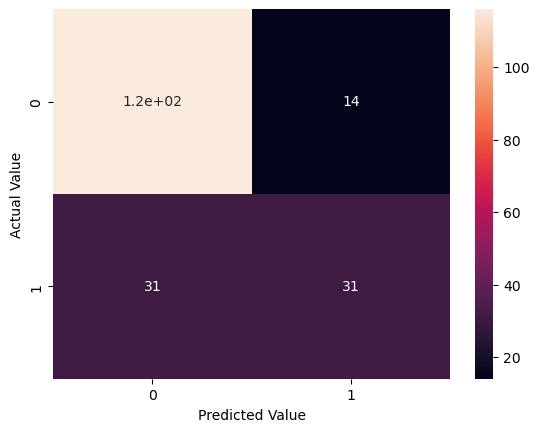

In [11]:
sns.heatmap(cm, annot = True)  # Creating a confusion matrix in form of a heat map.
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [12]:
import sklearn.metrics as metrics  # Finding accuracy precision and recall of the Algorithm
print ('Accuracy: ', metrics.accuracy_score(ytest,y_pred))
print ('Precision: ', metrics.precision_score(ytest,y_pred))
print ('Recall: ', metrics.recall_score(ytest,y_pred))

Accuracy:  0.765625
Precision:  0.6888888888888889
Recall:  0.5


In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       130
           1       0.69      0.50      0.58        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192



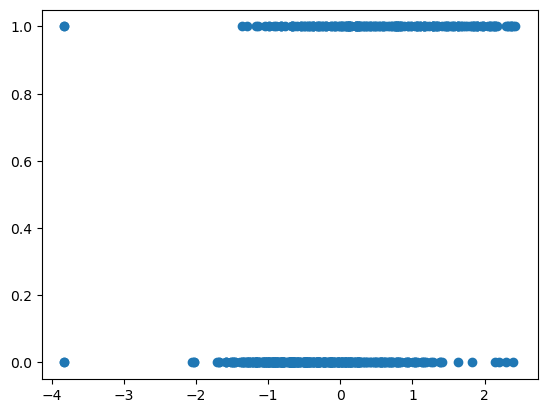

In [14]:
plt.scatter(xtrain[:, 0], ytrain)
#Age